## Import the library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [4]:
train_file_path = '../data/train.csv'
dataset_df = pd.read_csv(train_file_path, sep=',', header=0)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (90000, 54)


The data is composed of 54 columns and 90000 entries. We can see all 54 dimensions of our dataset by printing out the first 3 entries using the following code:

In [5]:
dataset_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162


There are 53 feature columns. Using these features your model has to predict the target indicated by the label column named target.

We can inspect the types of feature columns using the following code:

In [6]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [7]:
# Calculate the number of missing values in the dataset
print('All missing values in the dataset: ', dataset_df.isnull().sum().sum())

All missing values in the dataset:  0


In [8]:
# Check the data types of the columns
dataset_df.dtypes.value_counts()

float64    43
int64      11
Name: count, dtype: int64

In [9]:
dataset_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


## Target variable distribution
Now let us take a look at how the target variable is distributed in the dataset.

count    90000.000000
mean        50.033981
std         28.897243
min          0.002634
25%         25.091903
50%         50.030705
75%         75.059454
max         99.999482
Name: target, dtype: float64


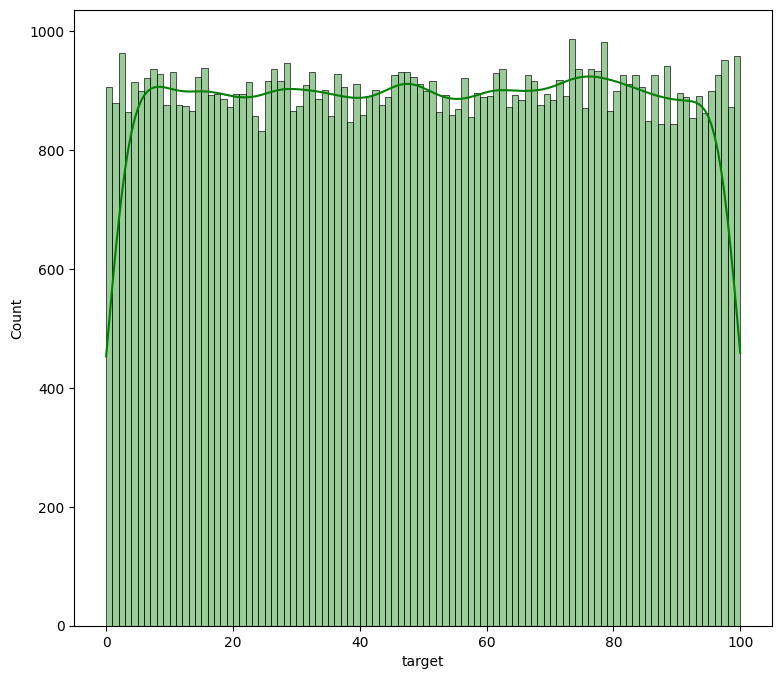

In [10]:
print(dataset_df['target'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset_df['target'], color='g', bins=100, kde=True, alpha=0.4)
plt.show()

## Numerical data disstribution 
We will now take a look at how the numerical features are distributed. In our dataset we have only numerical features.

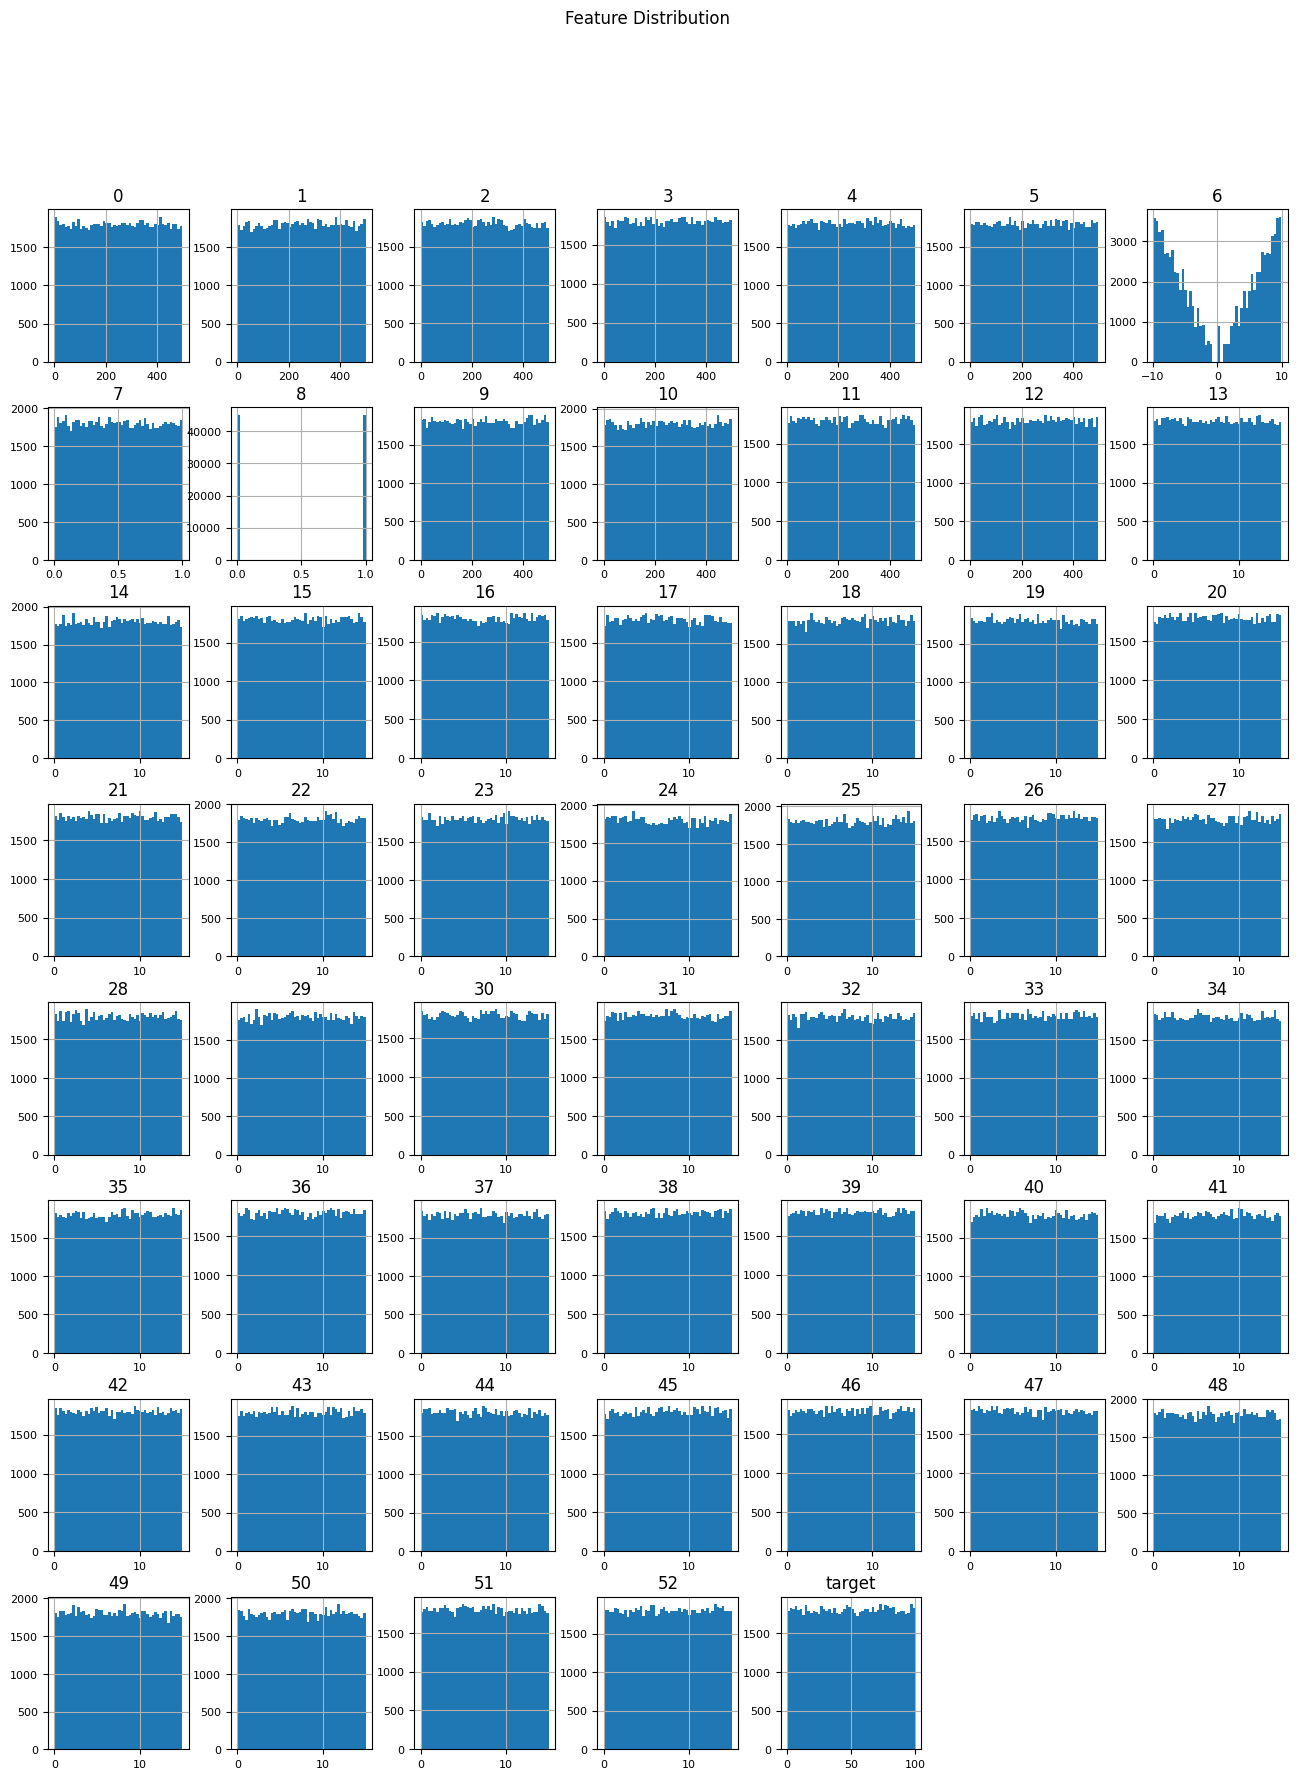

In [11]:
dataset_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.suptitle('Feature Distribution')
plt.show()

## Checking the correlations bettwen features.

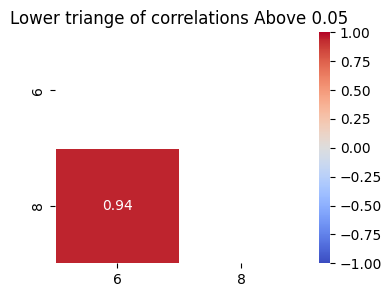

In [12]:
corr_matrix = dataset_df.corr()
# 1. Filtering the correlation matrix to show only high correlations
threshold = 0.05  # Set the threshold for displaying correlations
high_corr = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix != 1.0)]

# Remove rows and columns that are all NaN after filtering
high_corr = high_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Mask for the upper triangle
mask = np.triu(np.ones_like(high_corr, dtype=bool))

# Displaying filtered correlation matrix
plt.figure(figsize=(4, 3))
sns.heatmap(high_corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmax=1, vmin=-1)
plt.title(f'Lower triange of correlations Above {threshold}')
plt.show()


In [13]:
# Checking this correlation
dataset_df[['6', '8']].sample(5)

,6,8
54444,4.795832,1
71306,5.830952,1
57657,6.164414,1
31254,8.062258,1
14733,9.746794,1


In [14]:
# Checking a quick idea, whether column 8 is derived from column 6, with the condition that if the value in column 6 is less than 
# (or less than or equal to) 0, the value in column 8 is 0, otherwise 1
tmp = np.where(dataset_df['6'] < 0.0, 0, 1) == dataset_df['8']
tmp.value_counts()

8
True     89565
False      435
Name: count, dtype: int64

In [15]:
# Checking the cases where the above idea doesn't hold
dataset_df[~tmp][['6', '8']].value_counts()

6     8
-0.0  0    435
Name: count, dtype: int64

As you can see, the idea didn’t work in the case where the value in column 6 is -0.0, and the value in column 8 is 0. The value -0.0 is a specific value that is equal to 0 but is represented in a particular way, which may cause issues data analysis. Therefore, I consider column 8 unnecessary, as it can be recreated from column 6 with the condition that if the value in column 6 is less than (or less than or equal to) 0, the value in column 8 is 0, otherwise 1.

So we can remove column 8, but since we are using the RandomForest algorithm, its presence in the data will not cause any issues. dataset_df.drop(columns=['8'], inplace=True)

## Detecting outliers

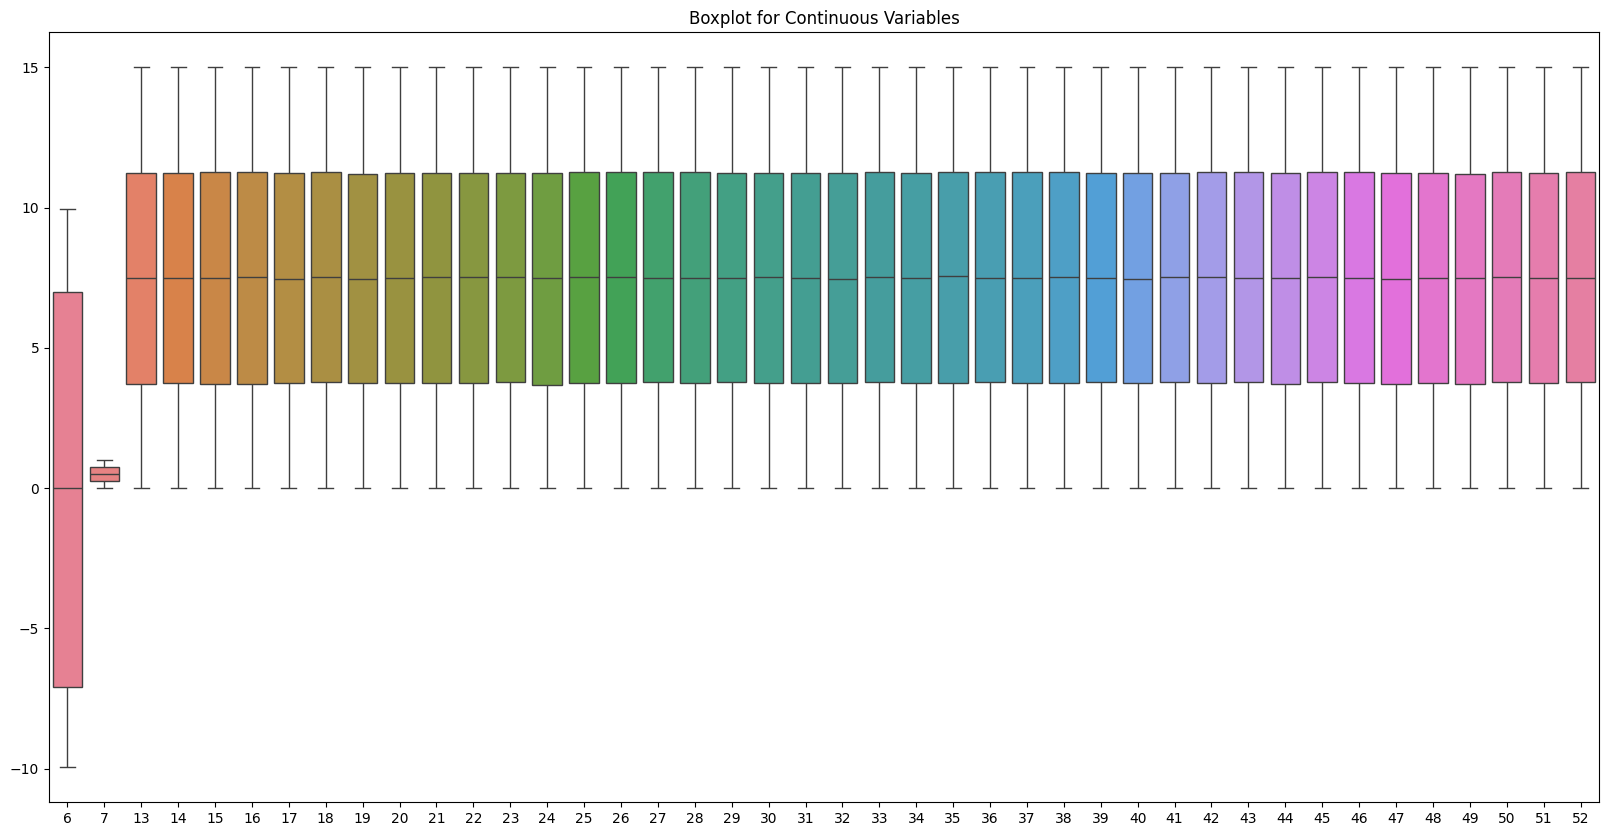

In [17]:
# Box plots for continuous variables to detect outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=dataset_df.drop(columns=['target']).select_dtypes(include=['float64']))
plt.title('Boxplot for Continuous Variables')
plt.show()

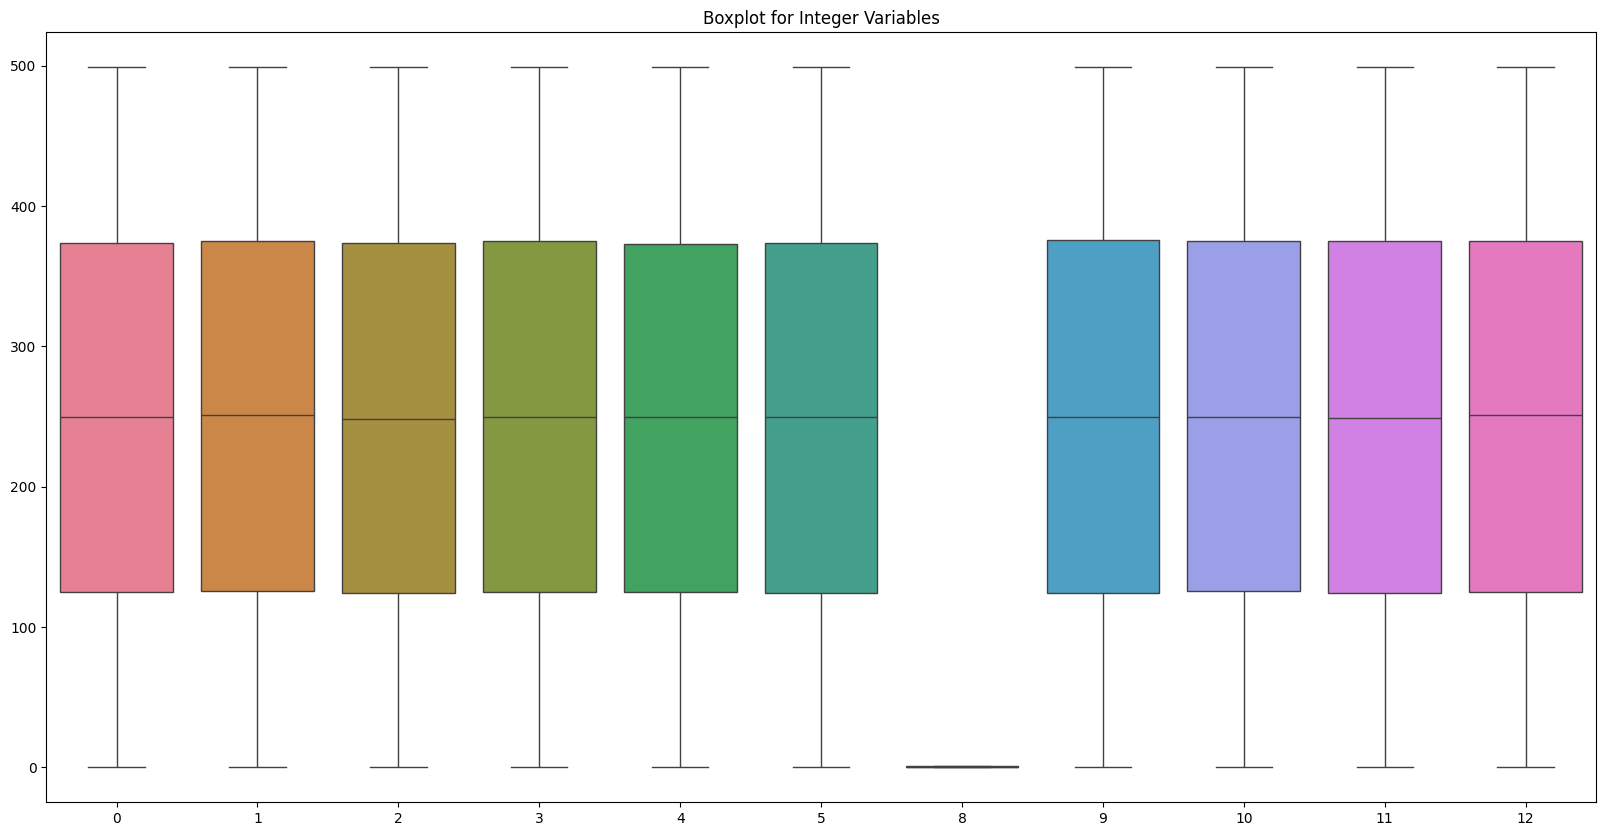

In [18]:
# Box plots for integer variables to detect outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=dataset_df.select_dtypes(include=['int64']))
plt.title('Boxplot for Integer Variables')
plt.show()

No outliers in data

As we can see, a features are from range:
- a few of them are from 0 to 500,
- a few of them are from 0 to 15,
- once of them from 0 to 1,
- once of them is binary (0 or 1),
- once of them is from -10 to 10,
- and the target is from 0 to 100. 

As you can see, the features have different ranges. Such features can be prepared and scaled using methods like standardization or normalization. However, we will not apply scaling here because we will be using the RandomForest algorithm, which does not require scaling.